In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("headbrain.csv")

In [8]:
data.shape

(237, 4)

In [4]:
data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


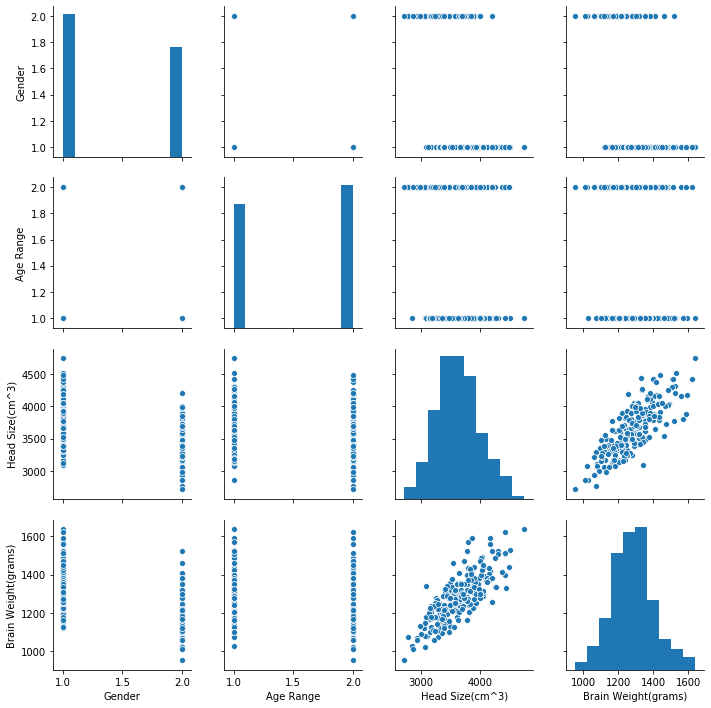

In [7]:
sns.pairplot(data)

* The line equation y = mx + c with m = (Slope) and c = (Intercept). 
* So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

In [13]:
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [14]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [15]:
length_x = len(X)
length_y = len(Y)

* total error of this model is the sum of all errors of each point.

* Regression Line, y = mx+c where,

* y = Dependent Variable

* x= Independent Variable ; c = y-Intercept


In [18]:
covariance = 0
div = 0
for i in range(length_x):
    covariance += (X[i]-mean_x)*(Y[i]-mean_y)
    div += (X[i]-mean_x)**2
m = covariance/div
c = mean_y - m*mean_x
print(m,c)

0.26342933948939945 325.57342104944223


* There we have our coefficients.

* Brain Weight = 325.573421049 + 0.263429339489 * Head Size

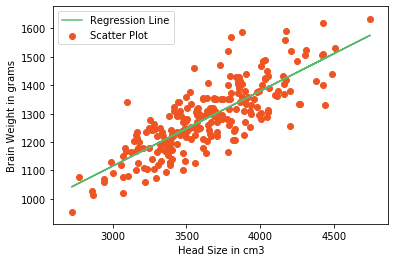

In [21]:
# Plotting Values and Regression Line
x = X    
y = c + m * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [22]:
rmse = 0
for i in range(length_x):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/length_x)
print(rmse)

72.1206213783709


In [32]:
ss_r = 0
ss_t = 0
for i in range(length_x):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r_square = 1 - (ss_r/ss_t)
print(r_square)

0.6393117199570003


#### The scikit-learn approach
* scikit-learn is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let's see how we can build this Simple Linear Regression Model using scikit-learn.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((length_x, 1)) # reshaping the data since it has single column
reg = LinearRegression() # creating the model
reg = reg.fit(X,Y) #fit the model
y_pred = reg.predict(X) # predicting the y values

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, y_pred) # calculating mean square error
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y) # r_square value

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
